# Week 02 : Working with BioStrings

## [Biostrings](https://bioconductor.org/packages/release/bioc/html/Biostrings.html)
The Biostrings package contains classes and functions for representing biological strings such as DNA, RNA and amino acids. In addition the package has functionality for pattern matching (short read alignment) as well as a pairwise alignment function implementing Smith-Waterman local alignments and Needleman-Wunsch global alignments used in classic sequence alignment (see (Durbin et al. 1998) for a description of these algorithms). There are also functions for reading and writing output such as FASTA files.

### Dependencies

In [2]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("Biostrings")



In [3]:
library(Biostrings)

### Representing sequences
There are two basic types of containers for representing strings. One container represents a single string (say a chromosome or a single short read) and the other container represents a set of strings (say a set of short reads). There are different classes intended to represent different types of sequences such as DNA or RNA sequences.

In [4]:
dna1 <- DNAString("ACGT-N")
dna1

6-letter DNAString object
seq: ACGT-N

In [5]:
DNAStringSet("ADE")

ERROR: Error in .Call2("new_XString_from_CHARACTER", class(x0), string, start, : key 69 (char 'E') not in lookup table


In [6]:
dna2 <- DNAStringSet(c("ACGT", "GTCA", "GCTA"))
dna2

DNAStringSet object of length 3:
    width seq
[1]     4 ACGT
[2]     4 GTCA
[3]     4 GCTA

Note that the alphabet of a DNAString is an extended alphabet: - (for insertion) and N are allowed. In fact, IUPAC codes are allowed (these codes represent different characters, for example the code “M” represents either and “A” or a “C”). A list of IUPAC codes can be obtained by

In [7]:
IUPAC_CODE_MAP

A      C      G      T      M      R      W      S      Y      K      V 
   "A"    "C"    "G"    "T"   "AC"   "AG"   "AT"   "CG"   "CT"   "GT"  "ACG" 
     H      D      B      N 
 "ACT"  "AGT"  "CGT" "ACGT"

Indexing into a DNAString retrieves a subsequence (similar to the standard R function substr), whereas indexing into a DNAStringSet gives you a subset of sequences.

In [8]:
dna1[2:4]

3-letter DNAString object
seq: CGT

In [9]:
dna2[2:3]

DNAStringSet object of length 2:
    width seq
[1]     4 GTCA
[2]     4 GCTA

Note that `[[` allows you to get a single element of a DNAStringSet as a DNAString. This is very similar to `[` and `[[` for lists.

In [10]:
dna2[[2]] 

4-letter DNAString object
seq: GTCA

In [11]:
# DNAStringSet objects can have names, like ordinary vectors
names(dna2) <- paste0("seq", 1:3)
dna2

DNAStringSet object of length 3:
    width seq                                               names               
[1]     4 ACGT                                              seq1
[2]     4 GTCA                                              seq2
[3]     4 GCTA                                              seq3

**The full set of string classes are**

- `DNAString`[Set]: DNA sequences.
- `RNAString`[Set]: RNA sequences.
- `AAString`[Set]: Amino Acids sequences (protein).
- `BString`[Set]: “Big” sequences, using any kind of letter.
In addition you will often see references to `XString`[Set] in the documentation. An `XString`[Set] is basically any of the above classes.

These classes seem very similar to standard characters() from base R, but there are important differences. The differences are mostly about efficiencies when you deal with either (a) many sequences or (b) very long strings (think whole chromosomes).

### Basic functionality

Basic character functionality is supported, like

- `length`, `names`.
- `c` and `rev` (reverse the sequence).
- `width`, `nchar` (number of characters in each sequence).
- `==`, `duplicated`, `unique`.
- `as.charcater` or `toString`: converts to a base character() vector.
- `sort`, `order`.
- `chartr`: convert some letters into other letters.
- `subseq`, subseq<-, extractAt, replaceAt.
- `replaceLetterAt`.

In [12]:
width(dna2)

[1] 4 4 4

In [13]:
sort(dna2)

DNAStringSet object of length 3:
    width seq                                               names               
[1]     4 ACGT                                              seq1
[2]     4 GCTA                                              seq3
[3]     4 GTCA                                              seq2

**Note that `rev` on a `DNAStringSet` just reverse the order of the elements, whereas rev on a DNAString actually reverse the string.**

In [15]:
rev(dna2)

DNAStringSet object of length 3:
    width seq                                               names               
[1]     4 GCTA                                              seq3
[2]     4 GTCA                                              seq2
[3]     4 ACGT                                              seq1

In [16]:
rev(dna1)

6-letter DNAString object
seq: N-TGCA

### Biological functionality

There are also functions which are related to the biological interpretation of the sequences, including

- `reverse`: reverse the sequence.
- `complement`, `reverseComplement`: (reverse) complement the sequence.
- `translate`: translate the DNA or RNA sequence into amino acids.

In [17]:
translate(dna2)

Warning message in .Call2("DNAStringSet_translate", x, skip_code, dna_codes[codon_alphabet], :
"in 'x[[1]]': last base was ignored"
Warning message in .Call2("DNAStringSet_translate", x, skip_code, dna_codes[codon_alphabet], :
"in 'x[[2]]': last base was ignored"
Warning message in .Call2("DNAStringSet_translate", x, skip_code, dna_codes[codon_alphabet], :
"in 'x[[3]]': last base was ignored"


AAStringSet object of length 3:
    width seq                                               names               
[1]     1 T                                                 seq1
[2]     1 V                                                 seq2
[3]     1 A                                                 seq3

In [18]:
reverseComplement(dna1)

6-letter DNAString object
seq: N-ACGT

### Counting letters

We very often want to count sequences in various ways. Examples include:

- Compute the GC content of a set of sequences.
- Compute the frequencies of dinucleotides in a set of sequences.
- Compute a position weight matrix from a set of aligned sequences.

There is a rich set of functions for doing this quickly.

- alphabetFrequency, letterFrequency: Compute the frequency of all characters (alphabetFrequency) or only specific letters (letterFrequency).
- dinucleotideFrequency, trinucleotideFrequency, oligonucleotideFrequeny: compute frequencies of dinucleotides (2 bases), trinucleotides (3 bases) and oligonucleotides (general number of bases).
- letterFrequencyInSlidingView: letter frequencies, but in sliding views along the string.
- consensusMatrix: consensus matrix; almost a position weight matrix.
  
Let’s look at some examples, note how the output expands to a matrix when you use the functions on a DNAStringSet:

In [19]:
alphabetFrequency(dna1)

A C G T M R W S Y K V H D B N - + . 
1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0

In [20]:
alphabetFrequency(dna2)

A,C,G,T,M,R,W,S,Y,K,V,H,D,B,N,-,+,.
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
letterFrequency(dna2, "GC")

G|C
2
2
2


In [22]:
consensusMatrix(dna2, as.prob = TRUE)

A,0.3333333,0.0000000,0.0000000,0.6666667
C,0.0000000,0.6666667,0.3333333,0.0000000
G,0.6666667,0.0000000,0.3333333,0.0000000
T,0.0000000,0.3333333,0.3333333,0.3333333
M,0.0000000,0.0000000,0.0000000,0.0000000
R,0.0000000,0.0000000,0.0000000,0.0000000
W,0.0000000,0.0000000,0.0000000,0.0000000
S,0.0000000,0.0000000,0.0000000,0.0000000
Y,0.0000000,0.0000000,0.0000000,0.0000000
K,0.0000000,0.0000000,0.0000000,0.0000000
V,0.0000000,0.0000000,0.0000000,0.0000000


In [23]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 22543)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
[1] Biostrings_2.60.2   GenomeInfoDb_1.28.4 XVector_0.32.0     
[4] IRanges_2.26.0      S4Vectors_0.30.2    BiocGenerics_0.38.0

loaded via a namespace (and not attached):
 [1] zlibbioc_1.38.0        uuid_0.1-4             rlang_0.4.12          
 [4] fastmap_1.1.0          fansi_1.0.2            tools_4.1.2           
 [7] utf8_1.2.2             htmltools_0.5.2        ellipsis_0.3.2        
[10] digest_0.6.27          lifecycle_1.0.1        crayon_1.4.2          
[13] GenomeInfoDbD

## [BSgenome](https://bioconductor.org/packages/release/bioc/html/BSgenome.html)

### Dependencies

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("BSgenome")
BiocManager::install("BSgenome.Scerevisiae.UCSC.sacCer2")

In [26]:
BiocManager::install("BSgenome.Scerevisiae.UCSC.sacCer2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'BSgenome.Scerevisiae.UCSC.sacCer2'

installing the source package 'BSgenome.Scerevisiae.UCSC.sacCer2'


Old packages: 'brew', 'digest', 'doParallel', 'foreach', 'fs', 'generics',
  'glue', 'gower', 'iterators', 'jsonlite', 'languageserver', 'magrittr',
  'pillar', 'readr', 'rlang', 'stringi', 'terra', 'testthat', 'tidyr', 'uuid',
  'xml2', 'pbdZMQ', 'randomForest'



The BSgenome package provides support for genomes. In Bioconductor, we have special classes for genomes, because the chromosomes can get really big. For example, the human genome takes up several GB of memory.

The `available.genomes()` function lists which genomes are currently available from from Bioconductor (it is possible to make your own genome package). Note that there are several so-called “masked” genomes, where some parts of the genome are masked. We will avoid this subject for now.

Let us load the latest yeast genome

In [27]:
library(BSgenome)
library(BSgenome.Scerevisiae.UCSC.sacCer2)

In [25]:
available.genomes()

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org




[1] "BSgenome.Alyrata.JGI.v1"                   
  [2] "BSgenome.Amellifera.BeeBase.assembly4"     
  [3] "BSgenome.Amellifera.NCBI.AmelHAv3.1"       
  [4] "BSgenome.Amellifera.UCSC.apiMel2"          
  [5] "BSgenome.Amellifera.UCSC.apiMel2.masked"   
  [6] "BSgenome.Aofficinalis.NCBI.V1"             
  [7] "BSgenome.Athaliana.TAIR.04232008"          
  [8] "BSgenome.Athaliana.TAIR.TAIR9"             
  [9] "BSgenome.Btaurus.UCSC.bosTau3"             
 [10] "BSgenome.Btaurus.UCSC.bosTau3.masked"      
 [11] "BSgenome.Btaurus.UCSC.bosTau4"             
 [12] "BSgenome.Btaurus.UCSC.bosTau4.masked"      
 [13] "BSgenome.Btaurus.UCSC.bosTau6"             
 [14] "BSgenome.Btaurus.UCSC.bosTau6.masked"      
 [15] "BSgenome.Btaurus.UCSC.bosTau8"             
 [16] "BSgenome.Btaurus.UCSC.bosTau9"             
 [17] "BSgenome.Carietinum.NCBI.v1"               
 [18] "BSgenome.Celegans.UCSC.ce10"               
 [19] "BSgenome.Celegans.UCSC.ce11"               
 [20] "BSgenome.Celegans.UCSC.ce2"                
 [21] "BSgenome.Celegans.UCSC.ce6"                
 [22] "BSgenome.Cfamiliaris.UCSC.canFam2"         
 [23] "BSgenome.Cfamiliaris.UCSC.canFam2.masked"  
 [24] "BSgenome.Cfamiliaris.UCSC.canFam3"         
 [25] "BSgenome.Cfamiliaris.UCSC.canFam3.masked"  
 [26] "BSgenome.Cjacchus.UCSC.calJac3"            
 [27] "BSgenome.Creinhardtii.JGI.v5.6"            
 [28] "BSgenome.Dmelanogaster.UCSC.dm2"           
 [29] "BSgenome.Dmelanogaster.UCSC.dm2.masked"    
 [30] "BSgenome.Dmelanogaster.UCSC.dm3"           
 [31] "BSgenome.Dmelanogaster.UCSC.dm3.masked"    
 [32] "BSgenome.Dmelanogaster.UCSC.dm6"           
 [33] "BSgenome.Drerio.UCSC.danRer10"             
 [34] "BSgenome.Drerio.UCSC.danRer11"             
 [35] "BSgenome.Drerio.UCSC.danRer5"              
 [36] "BSgenome.Drerio.UCSC.danRer5.masked"       
 [37] "BSgenome.Drerio.UCSC.danRer6"              
 [38] "BSgenome.Drerio.UCSC.danRer6.masked"       
 [39] "BSgenome.Drerio.UCSC.danRer7"              
 [40] "BSgenome.Drerio.UCSC.danRer7.masked"       
 [41] "BSgenome.Dvirilis.Ensembl.dvircaf1"        
 [42] "BSgenome.Ecoli.NCBI.20080805"              
 [43] "BSgenome.Gaculeatus.UCSC.gasAcu1"          
 [44] "BSgenome.Gaculeatus.UCSC.gasAcu1.masked"   
 [45] "BSgenome.Ggallus.UCSC.galGal3"             
 [46] "BSgenome.Ggallus.UCSC.galGal3.masked"      
 [47] "BSgenome.Ggallus.UCSC.galGal4"             
 [48] "BSgenome.Ggallus.UCSC.galGal4.masked"      
 [49] "BSgenome.Ggallus.UCSC.galGal5"             
 [50] "BSgenome.Ggallus.UCSC.galGal6"             
 [51] "BSgenome.Hsapiens.1000genomes.hs37d5"      
 [52] "BSgenome.Hsapiens.NCBI.GRCh38"             
 [53] "BSgenome.Hsapiens.UCSC.hg17"               
 [54] "BSgenome.Hsapiens.UCSC.hg17.masked"        
 [55] "BSgenome.Hsapiens.UCSC.hg18"               
 [56] "BSgenome.Hsapiens.UCSC.hg18.masked"        
 [57] "BSgenome.Hsapiens.UCSC.hg19"               
 [58] "BSgenome.Hsapiens.UCSC.hg19.masked"        
 [59] "BSgenome.Hsapiens.UCSC.hg38"               
 [60] "BSgenome.Hsapiens.UCSC.hg38.dbSNP151.major"
 [61] "BSgenome.Hsapiens.UCSC.hg38.dbSNP151.minor"
 [62] "BSgenome.Hsapiens.UCSC.hg38.masked"        
 [63] "BSgenome.Mdomestica.UCSC.monDom5"          
 [64] "BSgenome.Mfascicularis.NCBI.5.0"           
 [65] "BSgenome.Mfuro.UCSC.musFur1"               
 [66] "BSgenome.Mmulatta.UCSC.rheMac10"           
 [67] "BSgenome.Mmulatta.UCSC.rheMac2"            
 [68] "BSgenome.Mmulatta.UCSC.rheMac2.masked"     
 [69] "BSgenome.Mmulatta.UCSC.rheMac3"            
 [70] "BSgenome.Mmulatta.UCSC.rheMac3.masked"     
 [71] "BSgenome.Mmulatta.UCSC.rheMac8"            
 [72] "BSgenome.Mmusculus.UCSC.mm10"              
 [73] "BSgenome.Mmusculus.UCSC.mm10.masked"       
 [74] "BSgenome.Mmusculus.UCSC.mm8"               
 [75] "BSgenome.Mmusculus.UCSC.mm8.masked"        
 [76] "BSgenome.Mmusculus.UCSC.mm9"               
 [77] "BSgenome.Mmusculus.UCSC.mm9.masked"        
 [78] "BSgenome.Osativa.MSU.MSU7"                 
 [79] "BSgenome.Ppaniscu

In [28]:
Scerevisiae

Yeast genome:
# organism: Saccharomyces cerevisiae (Yeast)
# genome: sacCer2
# provider: UCSC
# release date: June 2008
# 18 sequences:
#   chrI    chrII   chrIII  chrIV   chrV    chrVI   chrVII  chrVIII chrIX  
#   chrX    chrXI   chrXII  chrXIII chrXIV  chrXV   chrXVI  chrM    2micron
# (use 'seqnames()' to see all the sequence names, use the '$' or '[[' operator
# to access a given sequence)


A BSgenome package contains a single object which is the second component of the name. At first, nothing is loaded into memory, which makes it very fast. You can get the length and names of the chromosomes without actually loading them.

In [29]:
seqlengths(Scerevisiae)

chrI   chrII  chrIII   chrIV    chrV   chrVI  chrVII chrVIII   chrIX    chrX 
 230208  813178  316617 1531919  576869  270148 1090947  562643  439885  745742 
  chrXI  chrXII chrXIII  chrXIV   chrXV  chrXVI    chrM 2micron 
 666454 1078175  924429  784333 1091289  948062   85779    6318

In [30]:
seqnames(Scerevisiae)

[1] "chrI"    "chrII"   "chrIII"  "chrIV"   "chrV"    "chrVI"   "chrVII" 
 [8] "chrVIII" "chrIX"   "chrX"    "chrXI"   "chrXII"  "chrXIII" "chrXIV" 
[15] "chrXV"   "chrXVI"  "chrM"    "2micron"

In [31]:
## We load a chromosome by using the [[ or $ operators:
Scerevisiae$chrI

230208-letter DNAString object
seq: CCACACCACACCCACACACCCACACACCACACCACA...GGTGTGTGGGTGTGGTGTGGGTGTGGTGTGTGTGGG

In [32]:
## We can now do things like compute the GC content of the first chromosome
letterFrequency(Scerevisiae$chrI, "CG", as.prob = TRUE)

C|G 
0.3927361

To iterate over chromosomes seems straightforward with lapply. However, this function may end up using a lot of memory because the entire genome is loaded. Instead there is the `bsapply` function which handles loading and unloading of different chromosomes. The interface to `bsapply` is weird at first; you set up a `BSparams` object which contains which function you are using and which genome you are using it on (and a bit more information). This paradigm is being used in other packages these days, for example [BiocParallel](https://bioconductor.org/packages/release/bioc/html/BiocParallel.html). An example will make this clear:

In [33]:
param <- new("BSParams", X = Scerevisiae, FUN = letterFrequency)
head(bsapply(param, letters = "GC"))

$chrI
  G|C 
90411 

$chrII
   G|C 
311807 

$chrIII
   G|C 
121998 

$chrIV
   G|C 
580699 

$chrV
   G|C 
222141 

$chrVI
   G|C 
104636

note how the additional argument `letters` to the `letterFrequency` function is given as an argument to bsapply, not to the BSParams object. This gives us a list; you can simplify the output (like the difference between `lapply` and `sapply`) by

In [34]:
param <- new("BSParams", X = Scerevisiae, FUN = letterFrequency, simplify = TRUE)
bsapply(param, letters = "GC")

chrI.G|C   chrII.G|C  chrIII.G|C   chrIV.G|C    chrV.G|C   chrVI.G|C 
      90411      311807      121998      580699      222141      104636 
 chrVII.G|C chrVIII.G|C   chrIX.G|C    chrX.G|C   chrXI.G|C  chrXII.G|C 
     415227      216586      171122      286167      253728      414843 
chrXIII.G|C  chrXIV.G|C   chrXV.G|C  chrXVI.G|C    chrM.G|C 2micron.G|C 
     353167      303042      416443      360871       14676        2463

Note how the mitochondria chromosome is very different. To conclude, the GC percentage of the genome is


In [35]:
sum(bsapply(param, letters = "GC")) / sum(seqlengths(Scerevisiae))

[1] 0.3814872

In [36]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 22543)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] BSgenome.Scerevisiae.UCSC.sacCer2_1.4.0
 [2] BSgenome_1.60.0                        
 [3] rtracklayer_1.52.1                     
 [4] GenomicRanges_1.44.0                   
 [5] Biostrings_2.60.2                      
 [6] GenomeInfoDb_1.28.4                    
 [7] XVector_0.32.0                         
 [8] IRanges_2.26.0                         
 [9] S4Vectors_0.30.2                       
[10] BiocGenerics_0.38.0                    

loaded via a namespace (and not att

## Biostrings - Matching

In [37]:
library(Biostrings)
library(BSgenome)
library(BSgenome.Scerevisiae.UCSC.sacCer2)

### Pattern matching

We often want to find patterns in (long) sequences. Biostrings have a number of functions for doing so

- matchPattern and vmatchPattern: match a single sequence against one sequence (matchPattern) or more than one (vmatchPattern) sequences.
- matchPDict and vmatchPDict: match a (possibly large) set of sequences against one sequence (matchPDict) or more than one (vmatchPDict) sequences.
These functions allows a small set of mismatches and some small indels. The Dict term is used because the function builds a “dictionary” over the sequences.

There are also functions with similar naming using count instead of match (eg. countPatterns). These functions returns the number of matches instead of precise information about where the matches occur.

In many ways, these functions are similar to using short read aligners like Bowtie. But these functions are designed to be comprehensive (return all matches satisfying certain criteria). Having this functionality available in Bioconductor can sometimes be very useful.

In [38]:
dnaseq <- DNAString("ACGTACGT")
matchPattern(dnaseq, Scerevisiae$chrI)

Views on a 230208-letter DNAString subject
subject: CCACACCACACCCACACACCCACACACCACACCA...TGTGTGGGTGTGGTGTGGGTGTGGTGTGTGTGGG
views:
      start   end width
  [1] 57932 57939     8 [ACGTACGT]

In [39]:
countPattern(dnaseq, Scerevisiae$chrI)

[1] 1

In [40]:
vmatchPattern(dnaseq, Scerevisiae)

GRanges object with 170 ranges and 0 metadata columns:
        seqnames        ranges strand
           <Rle>     <IRanges>  <Rle>
    [1]     chrI   57932-57939      +
    [2]     chrI   57932-57939      -
    [3]    chrII   49581-49588      +
    [4]    chrII 411291-411298      +
    [5]    chrII 491129-491136      +
    ...      ...           ...    ...
  [166]   chrXVI 195477-195484      -
  [167]   chrXVI 683620-683627      -
  [168]   chrXVI 837296-837303      -
  [169]   chrXVI 906938-906945      -
  [170]   chrXVI 943045-943052      -
  -------
  seqinfo: 18 sequences (2 circular) from sacCer2 genome

In [41]:
head(vcountPattern(dnaseq, Scerevisiae))

,seqname,strand,count
,<fct>,<fct>,<int>
1,chrI,+,1
2,chrI,-,1
3,chrII,+,4
4,chrII,-,4
5,chrIII,+,3
6,chrIII,-,3


See how we use vmatchPattern to examine across all chromosomes.

First, note how the return object of vmatchPattern is a GRanges given the exact information of where the string matches. Note sequence we search for is its own reverse complement, so we get hits on both strands (which makes sense). Obviously, not all sequences are like this

In [42]:
dnaseq == reverseComplement(dnaseq)

[1] TRUE

Second, note how the return object of matchPattern looks like an IRanges but is really something called a Views (see another session).

### Specialized alignments

There are a number of other, specialized, alignment functions in Biostrings. They include

- `matchPWM`: a position weight matrix is a common way to represent for example a transcription factor binding motif (think sequence logos). This function allows you to search for such motifs in the genome.
- `pairwiseAlignment`: This function implements pairwise alignments using dynamic programming; providing an interface to both the Smith-Waterman local alignment problem and the Needleman-Wunsch global alignment problems, see a thorough description in (Durbin et al. 1998).
- ` trimLRpattern` (trim left-right pattern): Takes a set of sequences and looks for whether they start or end with a given (other sequence), for example a sequencing adapter. Used for trimming reads based on adapter sequences.
For now, we will avoid further discussion of these functions.

One note: pairwiseAlignment allows you to do pairwise alignments of millions of short reads against a single sequence, for example a gene or a transposable element. Few people use these algorithms for short read data, because the algorithms scale badly with the length of the sequence (ie. the genome), but they work fine for millions of reads as long as the reference sequence is short. In my opinion this approach might be very fruitful if you are particular interested in high-quality alignments to a specific small gene or region of the genome.

In [43]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 22543)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] BSgenome.Scerevisiae.UCSC.sacCer2_1.4.0
 [2] BSgenome_1.60.0                        
 [3] rtracklayer_1.52.1                     
 [4] GenomicRanges_1.44.0                   
 [5] Biostrings_2.60.2                      
 [6] GenomeInfoDb_1.28.4                    
 [7] XVector_0.32.0                         
 [8] IRanges_2.26.0                         
 [9] S4Vectors_0.30.2                       
[10] BiocGenerics_0.38.0                    

loaded via a namespace (and not att

## BSgenome - Views

In [2]:
library(BSgenome)
library(BSgenome.Scerevisiae.UCSC.sacCer2)
library(AnnotationHub)

### Views

Views are used when you have a single big object (think chromosome or other massive dataset) and you need to deal with (many) subsets of this object. Views are not restricted to genome sequences; we will discuss Views on other types of objects in a different session.

Technically, a Views is like an IRanges couple with a pointer to the massive object. The IRanges contains the indexes. Let’s look at matchPattern again:

In [3]:
library("BSgenome.Scerevisiae.UCSC.sacCer2")
dnaseq <- DNAString("ACGTACGT")
vi <- matchPattern(dnaseq, Scerevisiae$chrI)
vi

Views on a 230208-letter DNAString subject
subject: CCACACCACACCCACACACCCACACACCACACCA...TGTGTGGGTGTGGTGTGGGTGTGGTGTGTGTGGG
views:
      start   end width
  [1] 57932 57939     8 [ACGTACGT]

### We can get the IRanges component by

In [4]:
ranges(vi)

IRanges object with 1 range and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]     57932     57939         8

In [5]:
Scerevisiae$chrI[ start(vi):end(vi) ]

8-letter DNAString object
seq: ACGTACGT

In [6]:
alphabetFrequency(vi)

A,C,G,T,M,R,W,S,Y,K,V,H,D,B,N,-,+,.
2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The advantage of Views is that they don’t duplicate the sequence information from the subject; all they keep track of are indexes into the subject (stored as IRanges). This makes it very (1) fast, (2) low-memory and makes it possible to do things like

In [7]:
shift(vi, 10)

Views on a 230208-letter DNAString subject
subject: CCACACCACACCCACACACCCACACACCACACCA...TGTGTGGGTGTGGTGTGGGTGTGGTGTGTGTGGG
views:
      start   end width
  [1] 57942 57949     8 [AAGCTTTG]

where we now get the sequence 10 bases next to the original match. This could not be done if all we had were the bases of the original subsequence.

In [8]:
vi

Views on a 230208-letter DNAString subject
subject: CCACACCACACCCACACACCCACACACCACACCA...TGTGTGGGTGTGGTGTGGGTGTGGTGTGTGTGGG
views:
      start   end width
  [1] 57932 57939     8 [ACGTACGT]

Views are especially powerful when there are many of them. A usecase I often have are the set of all exons (or promoters) of all genes in the genome. You can use GRanges as Views as well. Lets look at the hits from vmatchPattern

In [9]:
gr <- vmatchPattern(dnaseq, Scerevisiae)
vi2 <- Views(Scerevisiae, gr)
vi2

BSgenomeViews object with 170 views and 0 metadata columns:
        seqnames        ranges strand            dna
           <Rle>     <IRanges>  <Rle> <DNAStringSet>
    [1]     chrI   57932-57939      +     [ACGTACGT]
    [2]     chrI   57932-57939      -     [ACGTACGT]
    [3]    chrII   49581-49588      +     [ACGTACGT]
    [4]    chrII 411291-411298      +     [ACGTACGT]
    [5]    chrII 491129-491136      +     [ACGTACGT]
    ...      ...           ...    ...            ...
  [166]   chrXVI 195477-195484      -     [ACGTACGT]
  [167]   chrXVI 683620-683627      -     [ACGTACGT]
  [168]   chrXVI 837296-837303      -     [ACGTACGT]
  [169]   chrXVI 906938-906945      -     [ACGTACGT]
  [170]   chrXVI 943045-943052      -     [ACGTACGT]
  -------
  seqinfo: 18 sequences (2 circular) from sacCer2 genome

In [12]:
ahub <- AnnotationHub()
qh <- query(ahub, c("sacCer2", "genes"))
qh

snapshotDate(): 2021-05-18



AnnotationHub with 2 records
# snapshotDate(): 2021-05-18
# $dataprovider: UCSC
# $species: Saccharomyces cerevisiae
# $rdataclass: GRanges
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH7048"]]' 

           title        
  AH7048 | SGD Genes    
  AH7049 | Ensembl Genes

In [16]:
Sys.setenv(http_proxy="")
Sys.setenv(https_proxy="")
Sys.getenv("http_proxy")
Sys.getenv("https_proxy")

[1] ""

[1] ""

In [17]:
genes <- qh[[which(qh$title == "SGD Genes")]]
genes

downloading 1 resources

retrieving 1 resource

loading from cache



GRanges object with 6717 ranges and 5 metadata columns:
         seqnames        ranges strand |        name     score     itemRgb
            <Rle>     <IRanges>  <Rle> | <character> <numeric> <character>
     [1]     chrI 130802-131986      + |     YAL012W         0        <NA>
     [2]     chrI       335-649      + |     YAL069W         0        <NA>
     [3]     chrI       538-792      + |   YAL068W-A         0        <NA>
     [4]     chrI     1807-2169      - |     YAL068C         0        <NA>
     [5]     chrI     2480-2707      + |   YAL067W-A         0        <NA>
     ...      ...           ...    ... .         ...       ...         ...
  [6713]  chrXIII 923492-923800      - |     YMR326C         0        <NA>
  [6714]  2micron      252-1523      + |      R0010W         0        <NA>
  [6715]  2micron     1887-3008      - |      R0020C         0        <NA>
  [6716]  2micron     3271-3816      + |      R0030W         0        <NA>
  [6717]  2micron     5308-6198      - |    

In [18]:
prom <- promoters(genes)
head(prom, n = 3)

Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 37 out-of-bound ranges located on sequences
  chrI, chrV, chrX, chrII, chrIV, chrIX, chrVI, chrXI, chrXV, chrIII,
  chrVII, chrXII, chrXIV, chrXVI, chrVIII, and chrXIII. Note that ranges
  located on a sequence whose length is unknown (NA) or on a circular
  sequence are not considered out-of-bound (use seqlengths() and
  isCircular() to get the lengths and circularity flags of the underlying
  sequences). You can use trim() to trim these ranges. See
  ?`trim,GenomicRanges-method` for more information."


GRanges object with 3 ranges and 5 metadata columns:
      seqnames        ranges strand |        name     score     itemRgb
         <Rle>     <IRanges>  <Rle> | <character> <numeric> <character>
  [1]     chrI 128802-131001      + |     YAL012W         0        <NA>
  [2]     chrI     -1665-534      + |     YAL069W         0        <NA>
  [3]     chrI     -1462-737      + |   YAL068W-A         0        <NA>
              thick        blocks
          <IRanges> <IRangesList>
  [1] 130802-131986        1-1185
  [2]       335-649         1-315
  [3]       538-792         1-255
  -------
  seqinfo: 18 sequences (2 circular) from sacCer2 genome

We get a warning that some of these promoters are out-of-band (see the the second and third element in the prom object; they have negative values for their ranges). We clean it up and continue

In [19]:
prom <- trim(prom)
promViews <- Views(Scerevisiae, prom)
gcProm <- letterFrequency(promViews, "GC", as.prob = TRUE)
head(gcProm)

G|C
0.4668182
0.4868914
0.4572592
0.3731818
0.3859091
0.3309091


In the previous Biostrings session we computed the GC content of the yeast genome. Let us do it again, briefly

In [20]:
params <- new("BSParams", X = Scerevisiae, FUN = letterFrequency, simplify = TRUE)
gccontent <- bsapply(params, letters = "GC")
gcPercentage <- sum(gccontent) / sum(seqlengths(Scerevisiae))
gcPercentage

[1] 0.3814872

 Let us compare this genome percentage to the distribution of GC content for promoters

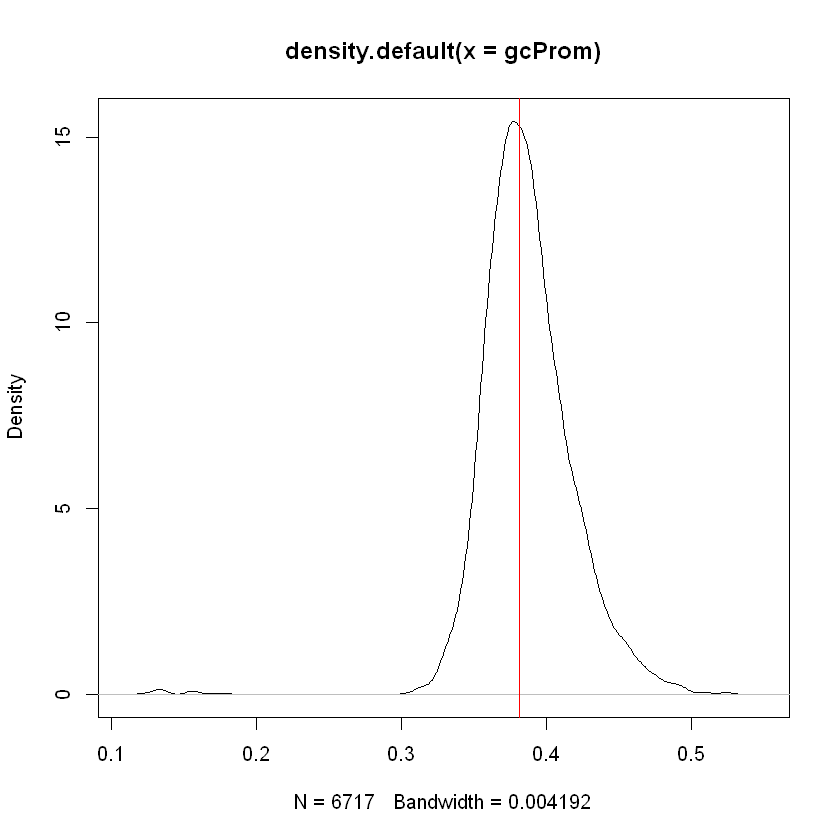

In [21]:
plot(density(gcProm))
abline(v = gcPercentage, col = "red")

In [22]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 22543)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] AnnotationHub_3.0.2                    
 [2] BiocFileCache_2.0.0                    
 [3] dbplyr_2.1.1                           
 [4] BSgenome.Scerevisiae.UCSC.sacCer2_1.4.0
 [5] BSgenome_1.60.0                        
 [6] rtracklayer_1.52.1                     
 [7] Biostrings_2.60.2                      
 [8] XVector_0.32.0                         
 [9] GenomicRanges_1.44.0                   
[10] GenomeInfoDb_1.28.4                    
[11] IRanges_2.26.0                 

## GenomicRanges - Rle

In [23]:
library(GenomicRanges)

### Coverage
In high-throughput sequencing, coverage is the number of reads overlapping each base. In other words, it associates a number (the number of reads) to every base in the genome.

This is a fundamental quantity for many high-throughout sequencing analyses. For variant calling (DNA sequencing) it tells you how much power (information) you have to call a variant at a given location. For ChIP sequencing it is the primary signal; areas with high coverage are thought to be enriched for a given protein.

A file format which is often used to represent coverage data is `Wig` or the modern version `BigWig`.

### Rle
An Rle (run-length-encoded) vector is a specific representation of a vector. The IRanges package implements support for this class. Watch out: there is also a base R class called rle which has much less functionality.

The run-length-encoded representation of a vector, represents the vector as a set of distinct runs with their own value. Let us take an example

In [24]:
rl <- Rle(c(1,1,1,1,2,2,3,3,2,2))
rl

numeric-Rle of length 10 with 4 runs
  Lengths: 4 2 2 2
  Values : 1 2 3 2

In [25]:
runLength(rl)

[1] 4 2 2 2

In [26]:
runValue(rl)

[1] 1 2 3 2

In [27]:
as.numeric(rl)

[1] 1 1 1 1 2 2 3 3 2 2

Note the accessor functions `runLength()` and `runValue()`.

This is a very efficient representation if

- the vector is very long
- there are a lot of consecutive elements with the same value
This is especially useful for genomic data which is either piecewise constant, or where most of the genome is not covered (eg. RNA sequencing in mammals).

In many ways Rles function as normal vectors, you can do arithmetic with them, transform them etc. using standard R functions like + and `log2`.

There are also `RleList` which is a list of `Rle`s. This class is used to represent a genome wide coverage track where each element of the list is a different chromosome.

### Useful functions for Rle
A standard usecase is that you have a number of regions (say IRanges) and you want to do something to your Rle over each of these regions. Enter `aggregate()`.

In [28]:
ir <- IRanges(start = c(2,6), width = 2)
aggregate(rl, ir, FUN = mean)

[1] 1.0 2.5

It is also possible to covert an IRanges to a Rle by the `coverage()` function. **This counts, for each integer, how many ranges overlap the integer**.

In [30]:
ir <- IRanges(start = 1:10, width = 3)
ir
rl <- coverage(ir)
rl

IRanges object with 10 ranges and 0 metadata columns:
           start       end     width
       <integer> <integer> <integer>
   [1]         1         3         3
   [2]         2         4         3
   [3]         3         5         3
   [4]         4         6         3
   [5]         5         7         3
   [6]         6         8         3
   [7]         7         9         3
   [8]         8        10         3
   [9]         9        11         3
  [10]        10        12         3

integer-Rle of length 12 with 5 runs
  Lengths: 1 1 8 1 1
  Values : 1 2 3 2 1

You can select high coverage regions by the slice() function:

In [31]:
slice(rl, 2)

Views on a 12-length Rle subject

views:
    start end width
[1]     2  11    10 [2 3 3 3 3 3 3 3 3 2]

### Views and Rles
In the sessions on the Biostrings package we learned about Views on genomes. Views can also be instantiated on Rles.

In [32]:
vi <- Views(rl, start = c(3,7), width = 3)
vi

Views on a 12-length Rle subject

views:
    start end width
[1]     3   5     3 [3 3 3]
[2]     7   9     3 [3 3 3]

with Views you can now (again) apply functions:

In [33]:
mean(vi)


[1] 3 3

This is very similar to using aggregate() described above.

### RleList

An RleList is simply a list of Rle. It is similar to a GRangesList in concept.

### Rles and GRanges
Rle’s can also be constructed from GRanges.

This often involves RleList where each element of the list is a chromosome. Surprisingly, we do not yet have an RleList type structure which also contains information about say the length of the different chromosomes.

In [34]:
gr <- GRanges(seqnames = "chr1", ranges = IRanges(start = 1:10, width = 3))
rl <- coverage(gr)
rl

RleList of length 1
$chr1
integer-Rle of length 12 with 5 runs
  Lengths: 1 1 8 1 1
  Values : 1 2 3 2 1


Using Views on such an object exposes some missing functionality


In [37]:
vi <- Views(rl, as(grView, "RangesList"))
vi

ERROR: Error in as(grView, "RangesList"): no method or default for coercing "GRanges" to "RangesList"


We get an error, mentioning some object called a RangesList. This type of object is similar to a GRanges and could be considered succeeded by the later class. We sometimes see instances of this popping around.

In [38]:
grView <- GRanges("chr1", ranges = IRanges(start = 2, end = 7))
vi <- Views(rl, grView)
vi

RleViewsList object of length 1:
$chr1
Views on a 12-length Rle subject

views:
    start end width
[1]     2   7     6 [2 3 3 3 3 3]


In [39]:
vi[[1]]

Views on a 12-length Rle subject

views:
    start end width
[1]     2   7     6 [2 3 3 3 3 3]

### Biology Usecase

Suppose we want to compute the average coverage of bases belonging to (known) exons.

Input objects are
reads: a GRanges.
exons: a GRanges.
pseudocode
```
bases <- reduce(exons)
nBases <- sum(width(bases))
nCoverage <- sum(Views(coverage(reads), bases))
nCoverage / nBases
```

In [40]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 22543)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] AnnotationHub_3.0.2                    
 [2] BiocFileCache_2.0.0                    
 [3] dbplyr_2.1.1                           
 [4] BSgenome.Scerevisiae.UCSC.sacCer2_1.4.0
 [5] BSgenome_1.60.0                        
 [6] rtracklayer_1.52.1                     
 [7] Biostrings_2.60.2                      
 [8] XVector_0.32.0                         
 [9] GenomicRanges_1.44.0                   
[10] GenomeInfoDb_1.28.4                    
[11] IRanges_2.26.0                 